In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-prediction-dataset/data_descriptions.csv
/kaggle/input/churn-prediction-dataset/train.csv
/kaggle/input/churn-prediction-dataset/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [3]:
train_path = ""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.lower().startswith("train") and filename.endswith(".csv"):
            train_path = os.path.join(dirname, filename)

In [4]:
df = pd.read_csv(train_path)
print("\nData Preview:")
display(df.head())


Data Preview:


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [5]:
# Check data info
print("\nBasic Info: ")
print(df.info())

print("\nMissing Values: ")
print(df.isna().sum())


Basic Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                2437

Phân loại các biến

In [6]:
numeric_cols = [
    "AccountAge", "MonthlyCharges", "TotalCharges", 
    "ViewingHoursPerWeek", "AverageViewingDuration", 
    "ContentDownloadsPerMonth", "UserRating", 
    "SupportTicketsPerMonth", "WatchlistSize"
]

categorical_cols = [
    "Gender", "SubscriptionType", "PaymentMethod", "PaperlessBilling",
    "ContentType", "MultiDeviceAccess", "DeviceRegistered", 
    "GenrePreference", "ParentalControl", "SubtitlesEnabled"
]

In [7]:
desc_numeric = pd.DataFrame(index=numeric_cols)

# Basic
desc_numeric["count"] = df[numeric_cols].count()
desc_numeric["mean"] = df[numeric_cols].mean()
desc_numeric["median"] = df[numeric_cols].median()
desc_numeric["mode"] = [df[c].mode().iloc[0] if not df[c].mode().empty else np.nan for c in numeric_cols]
desc_numeric["min"] = df[numeric_cols].min()
desc_numeric["max"] = df[numeric_cols].max()
desc_numeric["range"] = desc_numeric["max"] - desc_numeric["min"]

#  Dispersion
desc_numeric["variance"] = df[numeric_cols].var()
desc_numeric["std"] = df[numeric_cols].std()
desc_numeric["sem"] = df[numeric_cols].std() / np.sqrt(df[numeric_cols].count())  # Standard Error of Mean
desc_numeric["IQR"] = df[numeric_cols].quantile(0.75) - df[numeric_cols].quantile(0.25)

#  Dispersion shapes
desc_numeric["skewness"] = df[numeric_cols].skew()
desc_numeric["kurtosis"] = df[numeric_cols].kurt()
print("\nDescriptive statistic for numeric variables:")
display(desc_numeric)


Descriptive statistic for numeric variables:


,count,mean,median,mode,min,max,range,variance,std,sem,IQR,skewness,kurtosis
AccountAge,243787,60.083758,60.000000,93.000000,1.000000,119.000000,118.000000,1175.471047,34.285143,0.069439,60.000000,-0.002506,-1.199282
MonthlyCharges,243787,12.490695,12.495555,4.990062,4.990062,19.989957,14.999895,18.728255,4.327615,0.008765,7.499617,-0.003584,-1.201509
TotalCharges,243787,750.741017,649.878487,4.991154,4.991154,2378.723844,2373.732690,273605.649342,523.073273,1.059393,760.170335,0.694068,-0.262047
ViewingHoursPerWeek,243787,20.502179,20.523116,1.000065,1.000065,39.999723,38.999658,126.421990,11.243753,0.022772,19.455443,-0.001340,-1.199817
AverageViewingDuration,243787,92.264061,92.249992,5.000547,5.000547,179.999275,174.998728,2550.779586,50.505243,0.102290,87.525653,0.002758,-1.200900
ContentDownloadsPerMonth,243787,24.503513,24.000000,17.000000,0.000000,49.000000,49.000000,207.970252,14.421174,0.029208,25.000000,-0.000427,-1.201353
UserRating,243787,3.002713,3.002261,1.000007,1.000007,4.999989,3.999982,1.334624,1.155259,0.002340,2.001304,-0.000958,-1.201812
SupportTicketsPerMonth,243787,4.504186,4.000000,7.000000,0.000000,9.000000,9.000000,8.251534,2.872548,0.005818,5.000000,-0.000896,-1.225538
WatchlistSize,243787,12.018508,12.000000,16.000000,0.000000,24.000000,24.000000,51.739741,7.193034,0.014568,12.000000,-0.004500,-1.199512


In [8]:
#3. Dispersion for categorical variables
print("\n Frequencies for categorical variables:")
for col in categorical_cols:
    print(f"\n** {col}:")
    display(df[col].value_counts(normalize=True).round(3) * 100)
# normalize=True giúp tính % thay vì số lượng tuyệt đối


 Frequencies for categorical variables:

** Gender:


Gender
Female    50.0
Male      50.0
Name: proportion, dtype: float64


** SubscriptionType:


SubscriptionType
Standard    33.6
Basic       33.2
Premium     33.2
Name: proportion, dtype: float64


** PaymentMethod:


PaymentMethod
Electronic check    25.2
Credit card         25.0
Bank transfer       24.9
Mailed check        24.9
Name: proportion, dtype: float64


** PaperlessBilling:


PaperlessBilling
No     50.0
Yes    50.0
Name: proportion, dtype: float64


** ContentType:


ContentType
Both        33.5
TV Shows    33.3
Movies      33.2
Name: proportion, dtype: float64


** MultiDeviceAccess:


MultiDeviceAccess
No     50.1
Yes    49.9
Name: proportion, dtype: float64


** DeviceRegistered:


DeviceRegistered
Computer    25.1
Tablet      25.1
Mobile      25.0
TV          24.9
Name: proportion, dtype: float64


** GenrePreference:


GenrePreference
Comedy     20.1
Fantasy    20.1
Drama      20.0
Action     20.0
Sci-Fi     19.8
Name: proportion, dtype: float64


** ParentalControl:


ParentalControl
Yes    50.1
No     49.9
Name: proportion, dtype: float64


** SubtitlesEnabled:


SubtitlesEnabled
Yes    50.1
No     49.9
Name: proportion, dtype: float64

In [9]:
plot_dir = "/kaggle/working/plots"
os.makedirs(plot_dir, exist_ok=True)

Histogram and boxlots for **numeric variables:**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

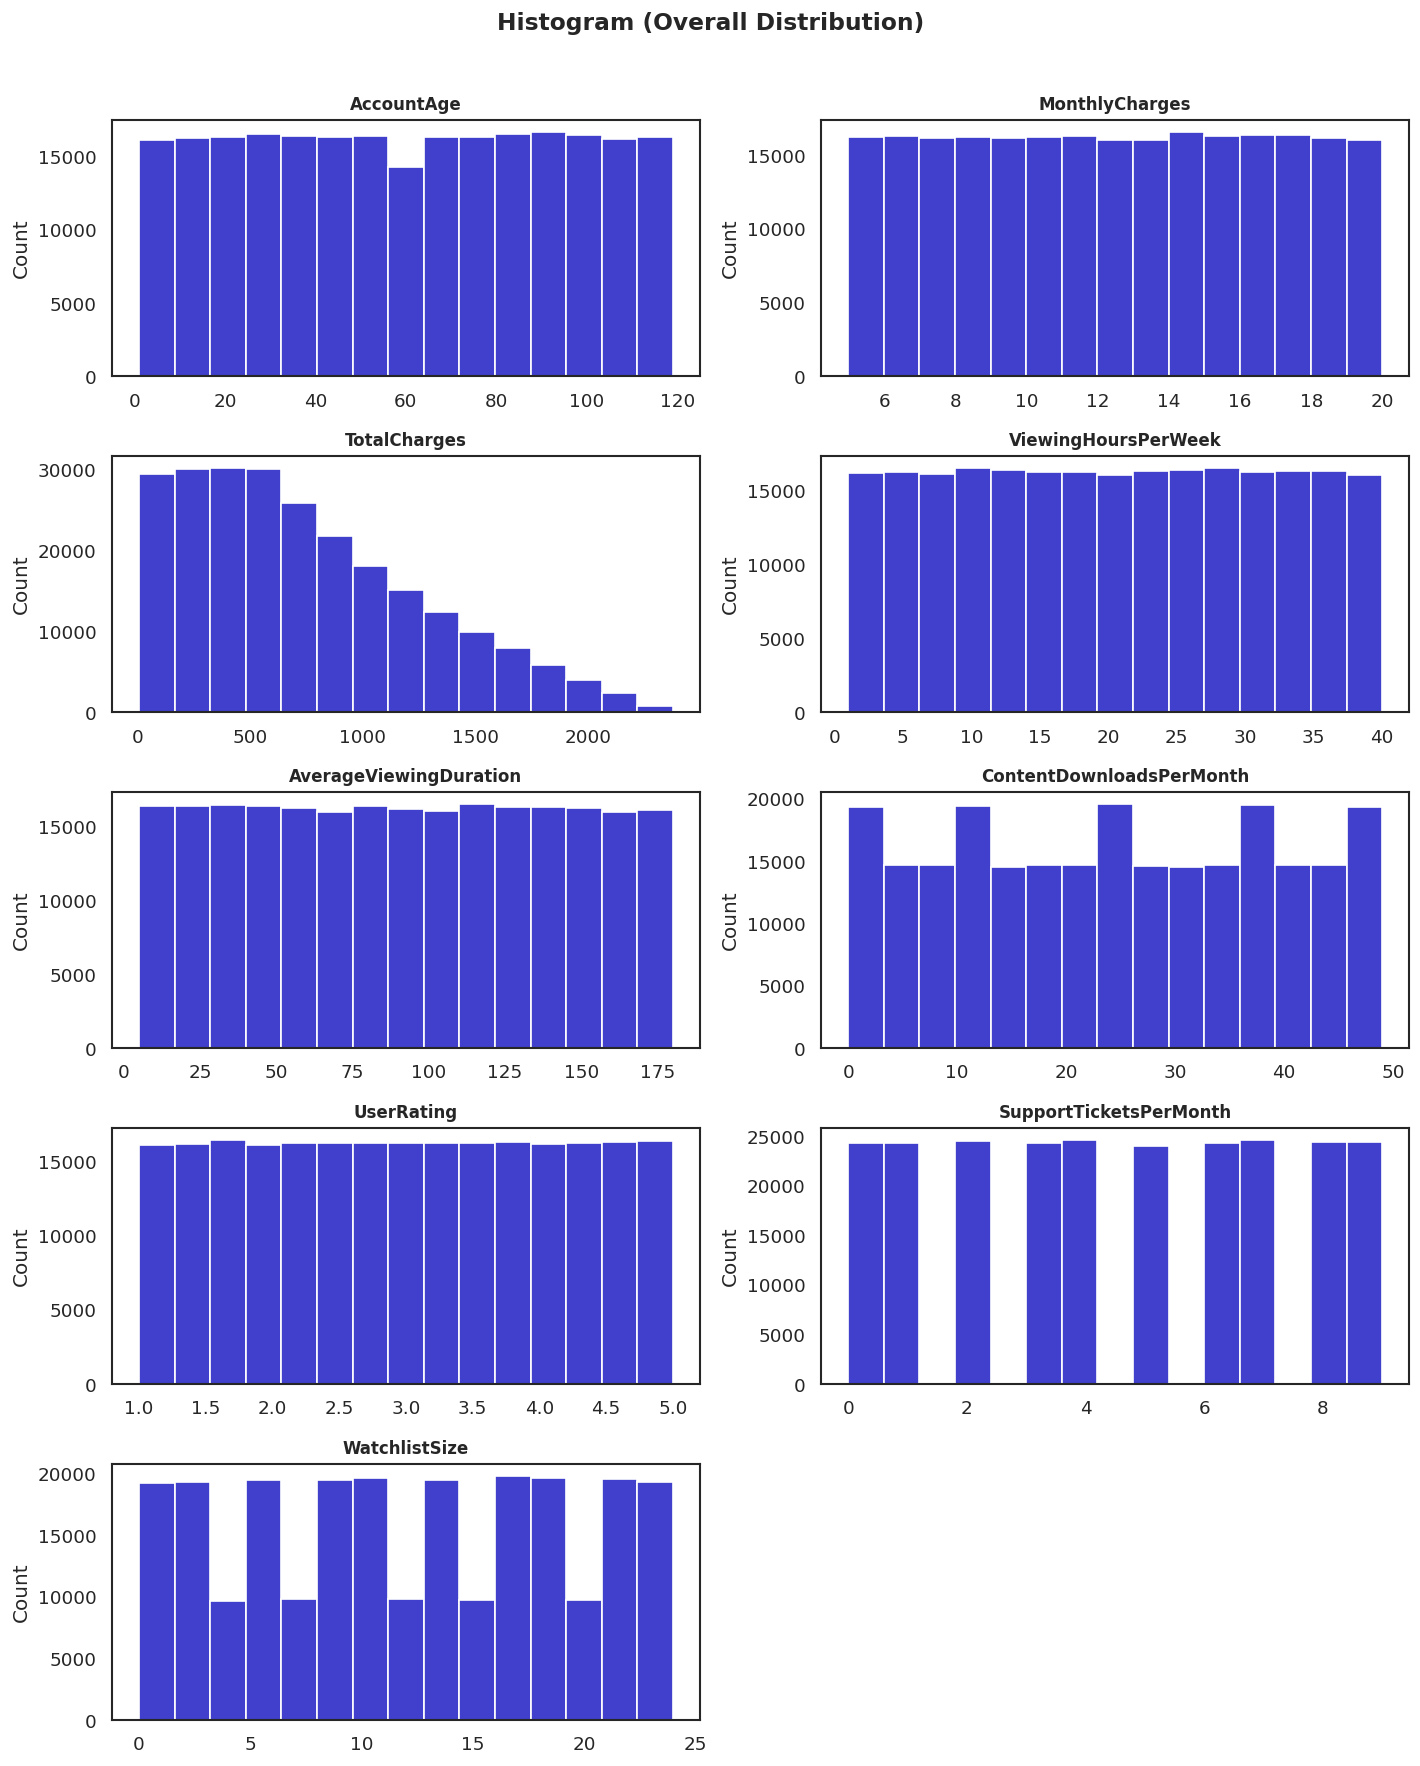

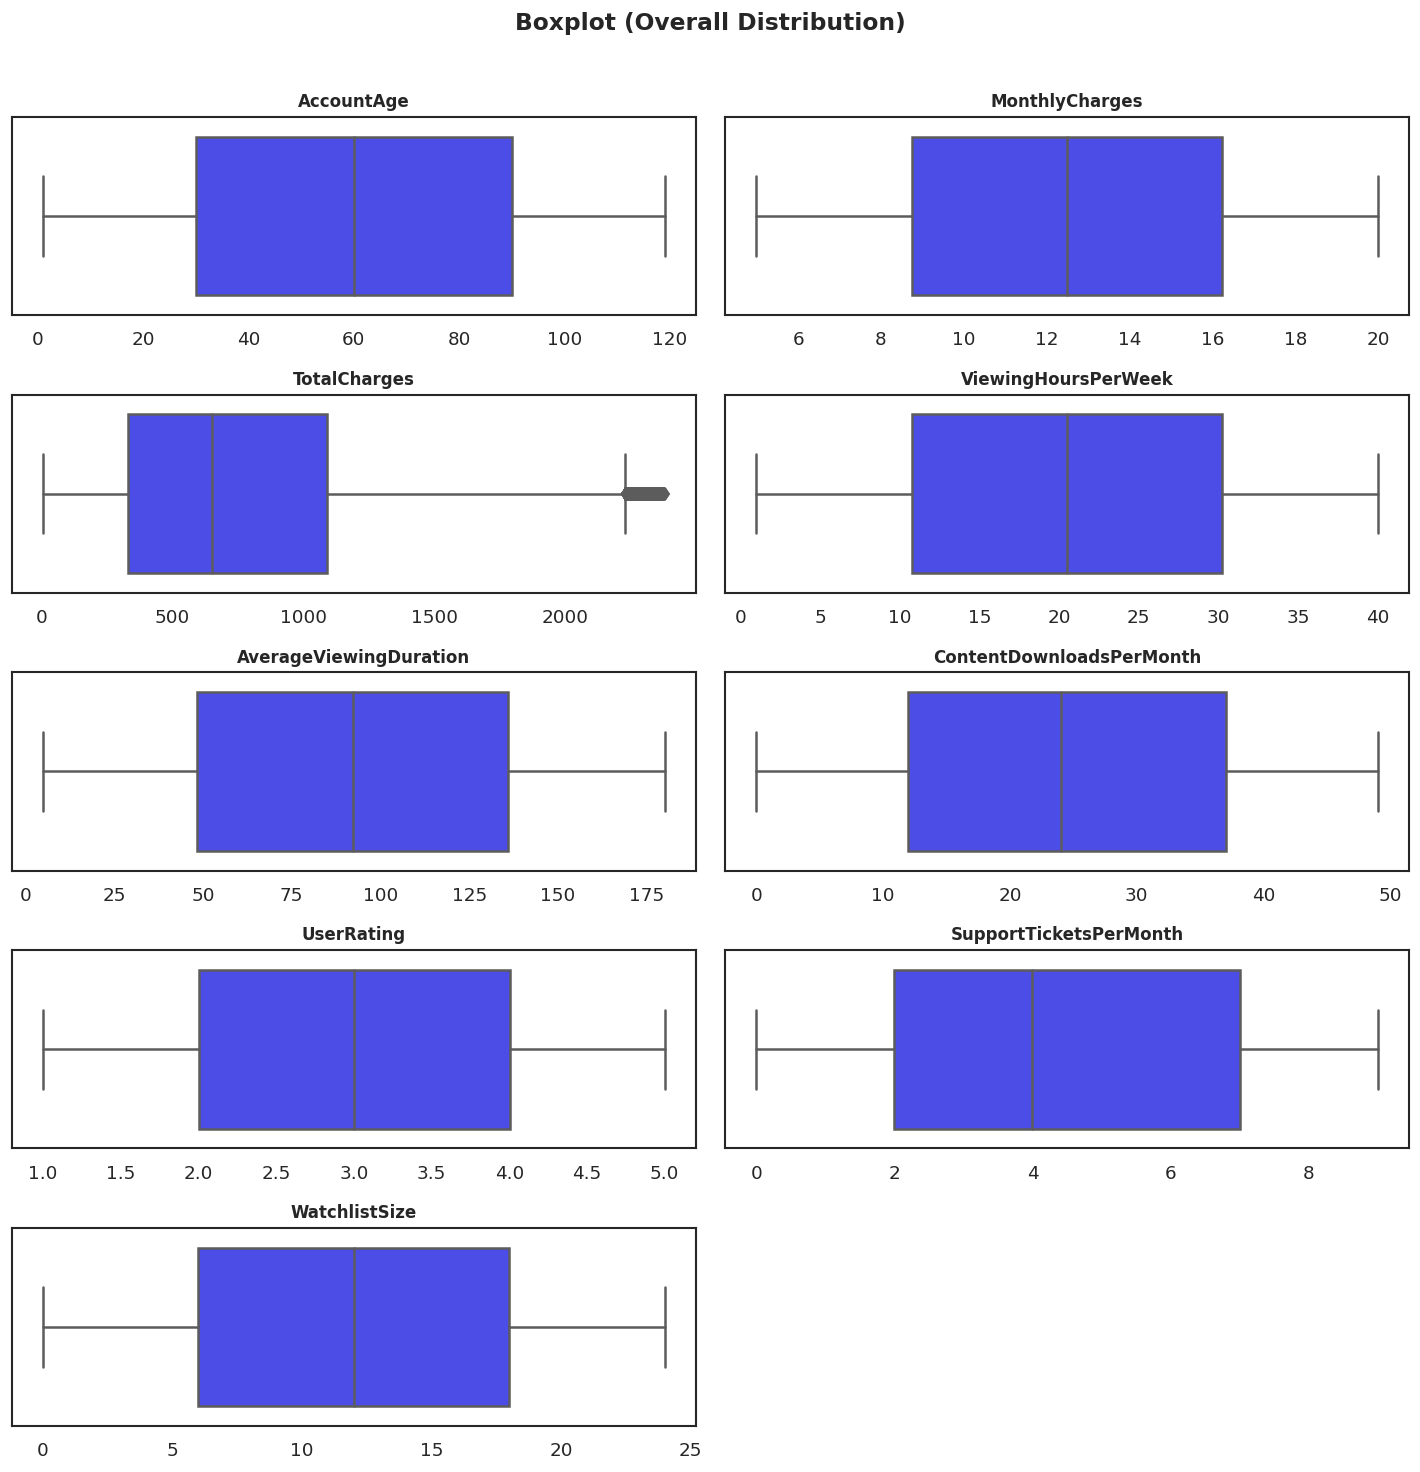

In [10]:
## Overal histograms

# Theme
sns.set_theme(style="white")
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.family"] = "DejaVu Sans"

# 3 charts/hàng
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

color = "#0000BB"

for i, col in enumerate(numeric_cols):
    if col not in df.columns:
        axes[i].set_visible(False)
        continue

    sns.histplot(df[col].dropna(), bins=15, kde=False, color=color, ax=axes[i])
    axes[i].set_title(col, fontsize=10, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Ẩn ô trống nếu thiếu biến
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Histogram (Overall Distribution)", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Overal box plots

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 2.5))
axes = axes.flatten()

box_color = "#3333ff"

for i, col in enumerate(numeric_cols):
    if col not in df.columns:
        axes[i].set_visible(False)
        continue

    sns.boxplot(x=df[col], color=box_color, ax=axes[i])
    axes[i].set_title(col, fontsize=10, fontweight="bold")
    axes[i].set_xlabel("")

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Boxplot (Overall Distribution)", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

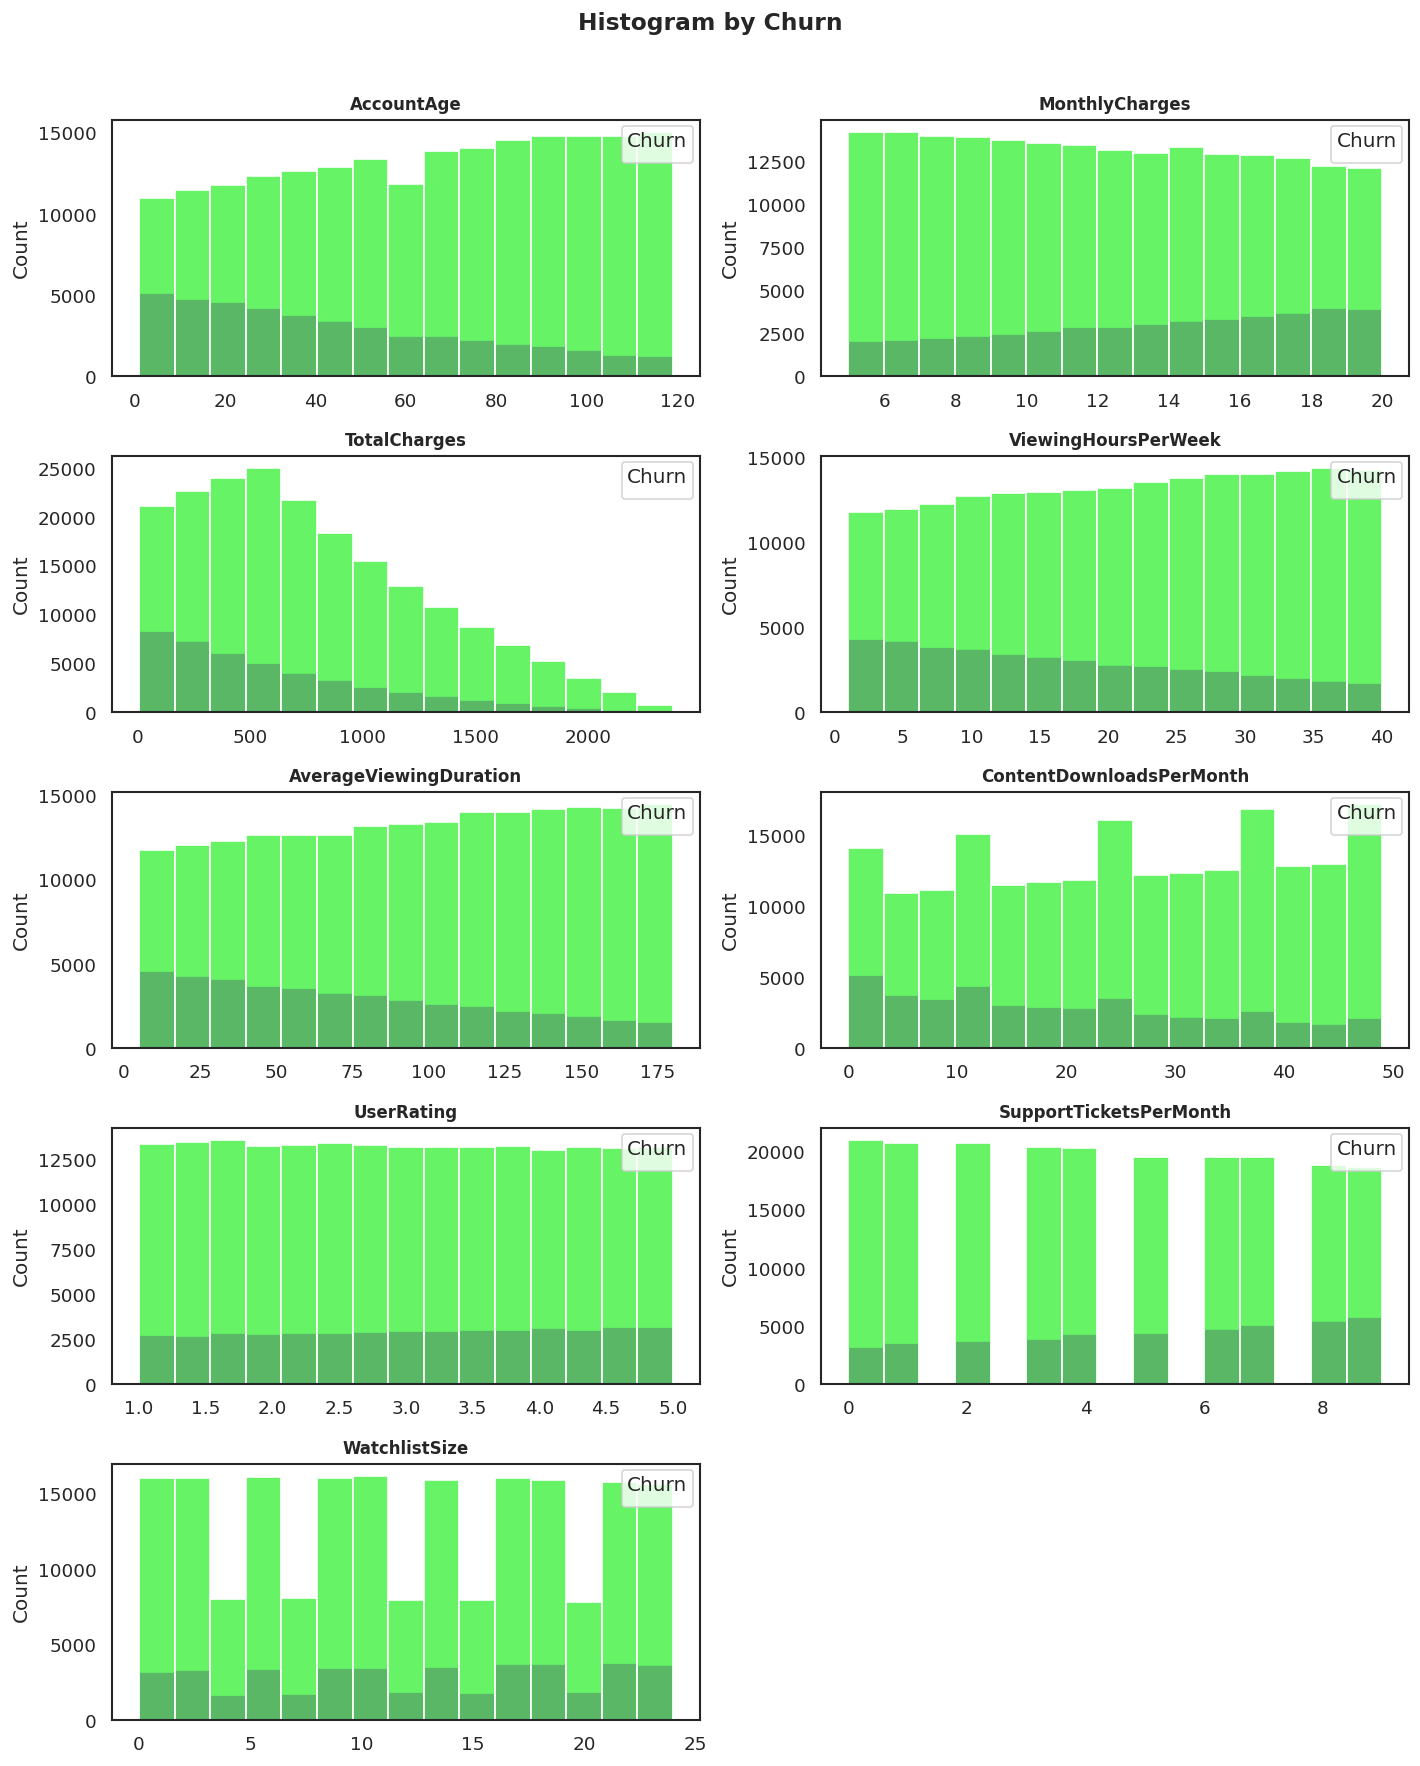

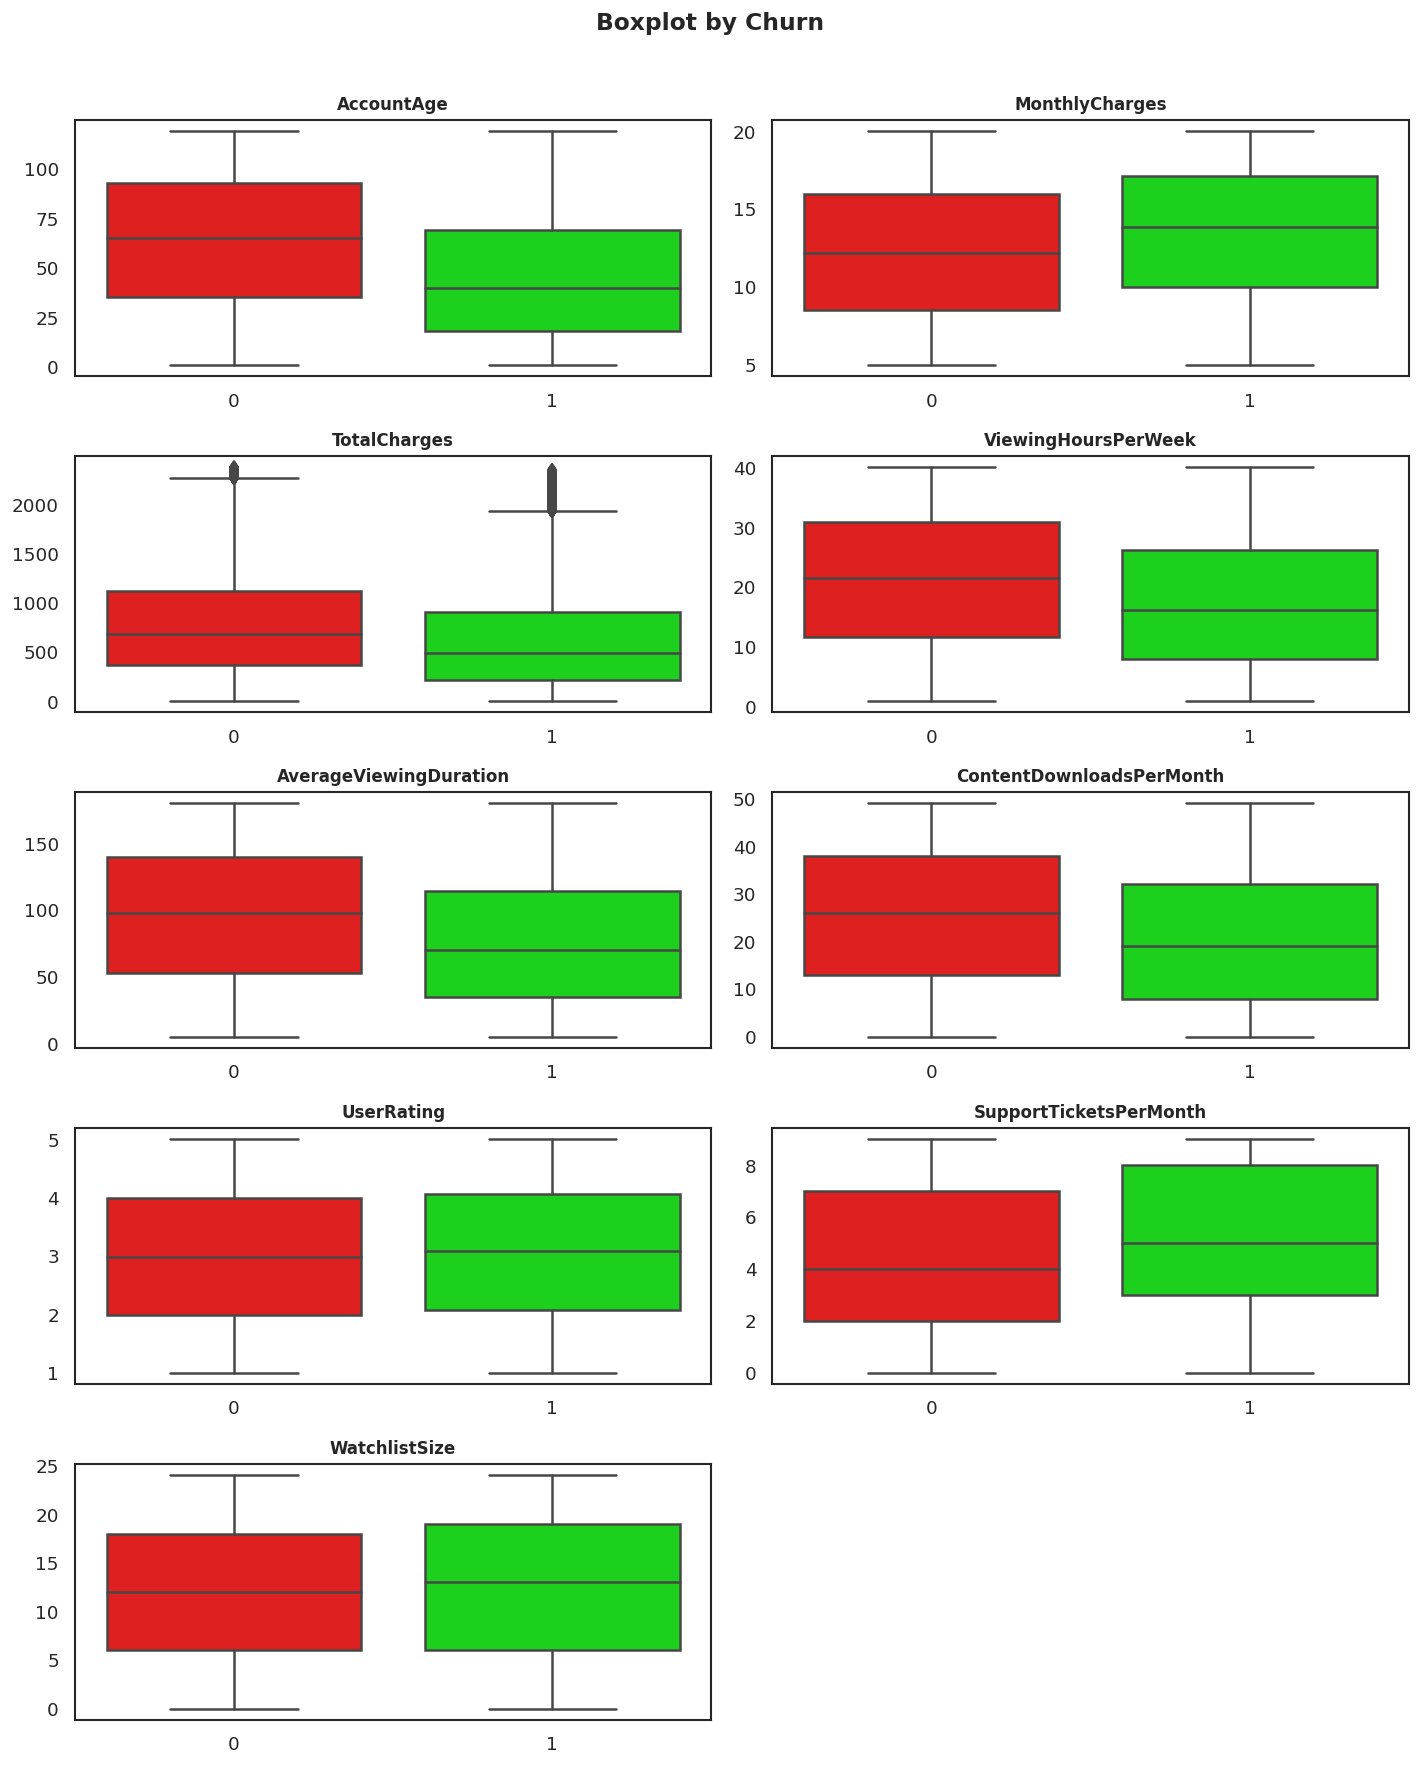

In [11]:
## Histograms and box plots by churn

# Theme
sns.set_theme(style="white")
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.family"] = "DejaVu Sans"

churn_palette = {0: "#00EE00", 1: "#CC00FF"}

n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col not in df.columns:
        axes[i].set_visible(False)
        continue

    sns.histplot(data=df, x=col, hue="Churn", bins=15, kde=False, 
                 palette=churn_palette, alpha=0.6, ax=axes[i])
    axes[i].set_title(col, fontsize=10, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Churn", loc="upper right", fontsize=8)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Histogram by Churn", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Boxplots by Churn
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col not in df.columns:
        axes[i].set_visible(False)
        continue

    sns.boxplot(x="Churn", y=col, data=df, palette=["#FF0000", "#00EE00"], ax=axes[i])
    axes[i].set_title(col, fontsize=10, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Boxplot by Churn", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Categorical variables: Countplots (dùng khi mất cân bằng dữ liệu, so sánh với các biến khác) -> phân bố tổng thể của biến phân loại.
- Hiểu phân bố tổng thể (overall distribution)->countplot
- Xác định mối quan hệ với Churn (rời bỏ dịch vụ)->
barplot hiển thị churn rate                        

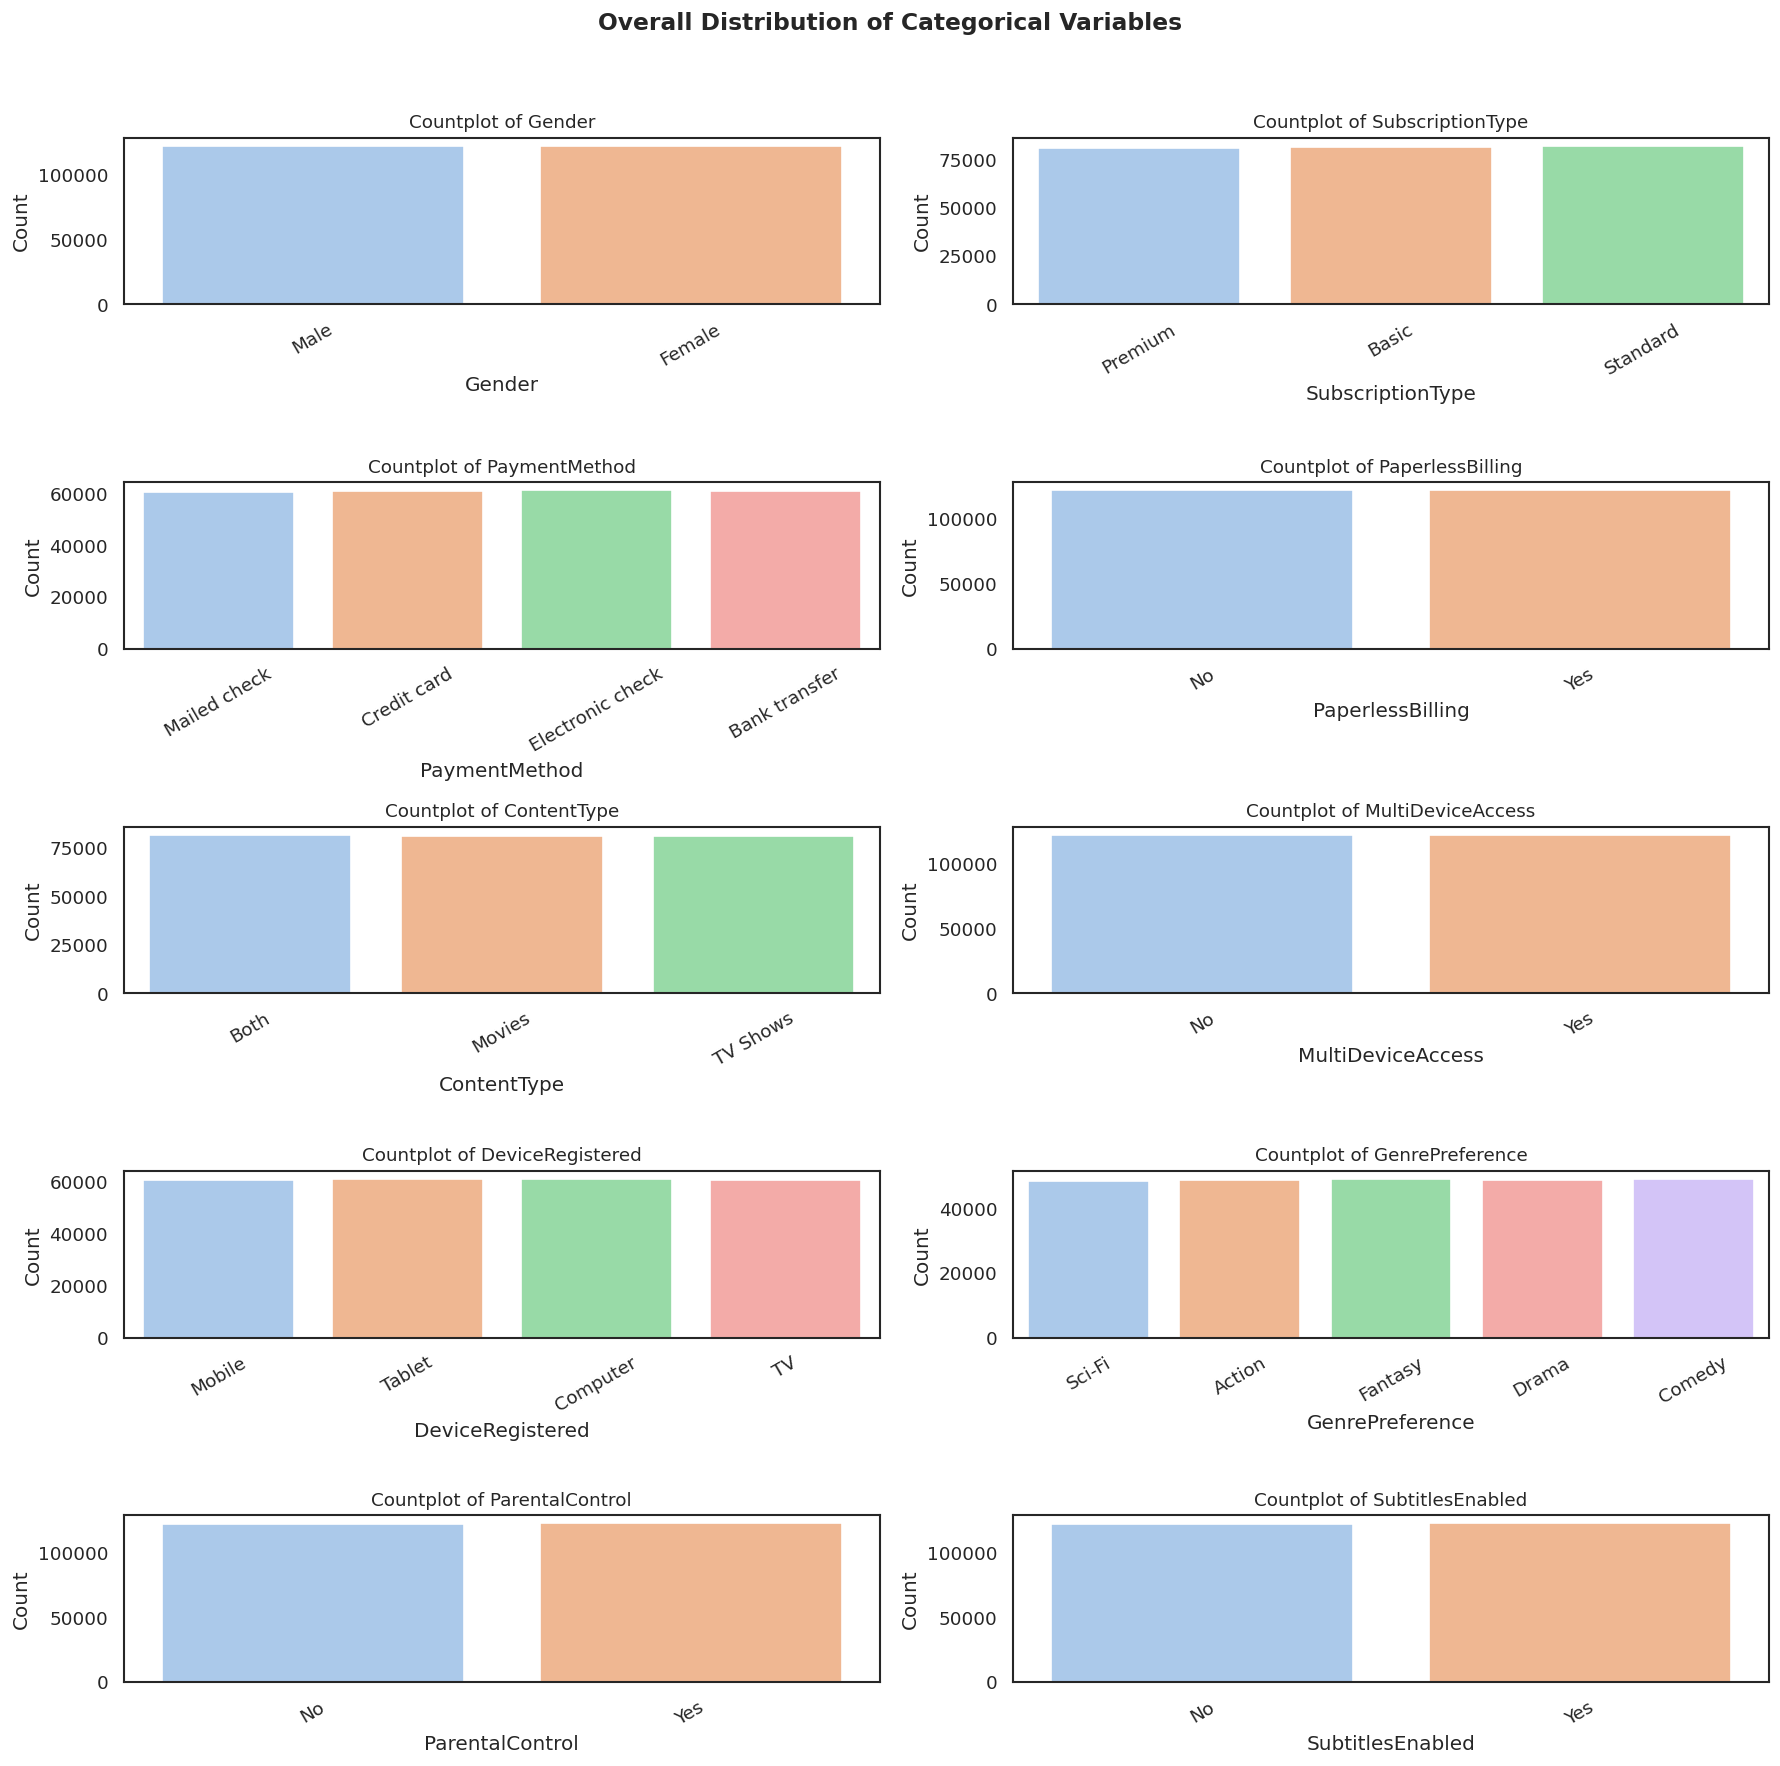

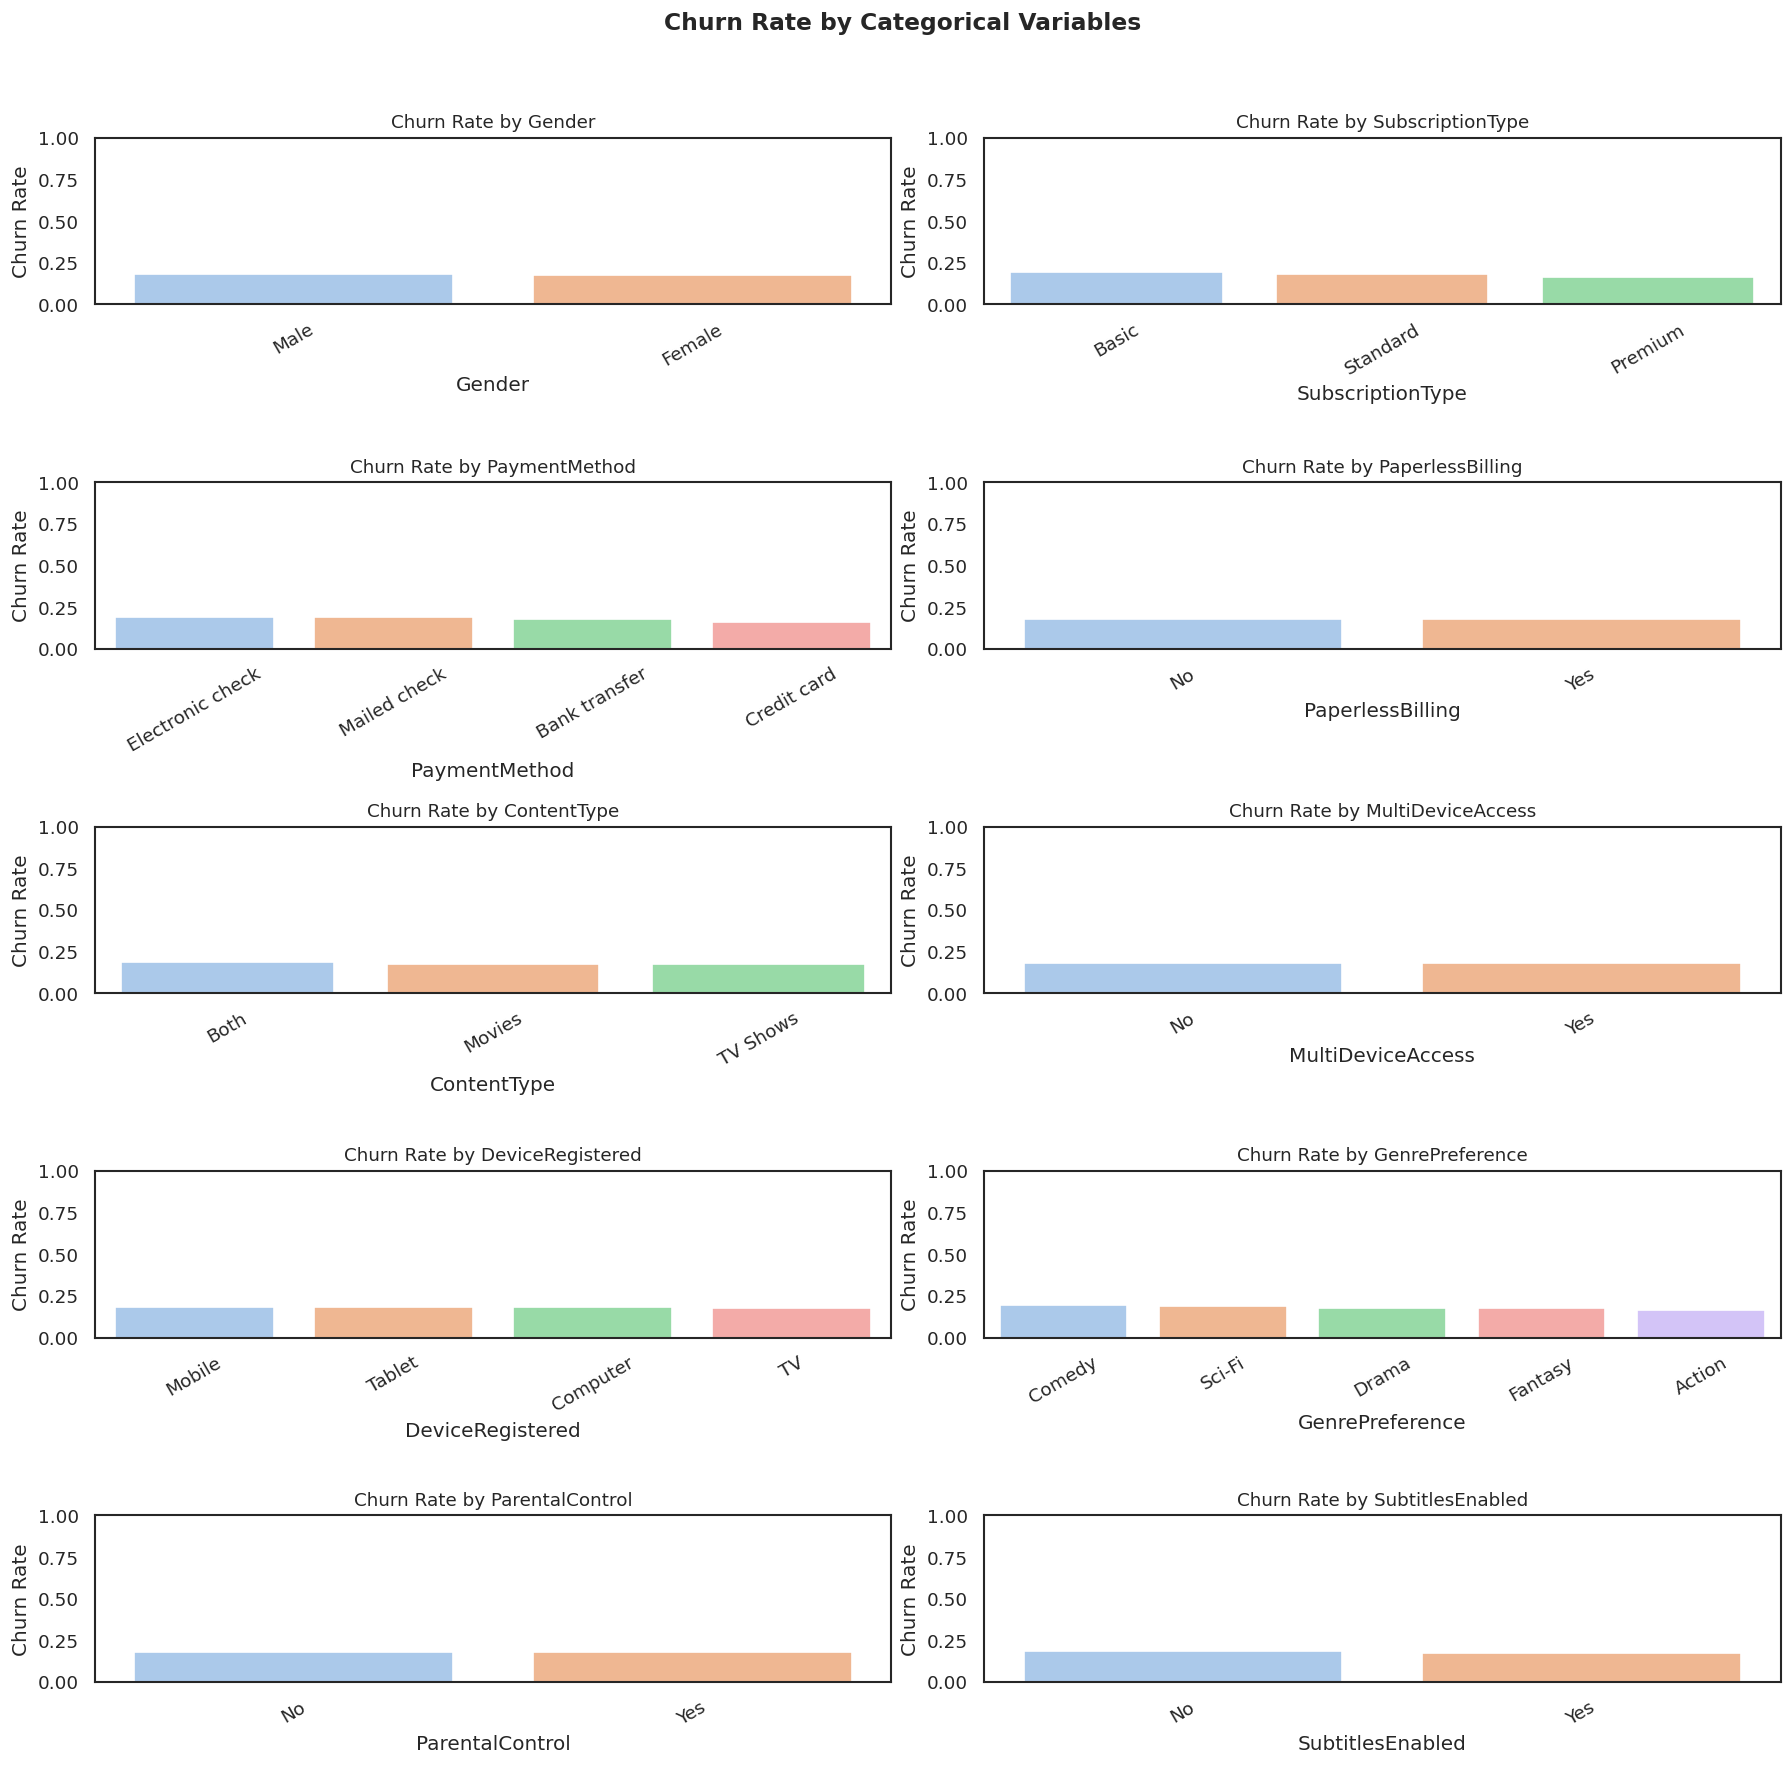

In [12]:
# only work with real variables in the dataset
cat_exist = [c for c in categorical_cols if c in df.columns]

# Layout settings
sns.set_theme(style="white", context="notebook")
palette = sns.color_palette("pastel", n_colors=8)

# Calculate number of c and r
n = len(cat_exist)
cols = 2
rows = math.ceil(n / cols)

# ---------------------------
# Overal countplots
# ---------------------------
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

for i, col in enumerate(cat_exist):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, palette=palette)
    ax.set_title(f"Countplot of {col}", fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=30)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Overall Distribution of Categorical Variables", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ---------------------------
# B. churn rate by categories
# ---------------------------

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

for i, col in enumerate(cat_exist):
    ax = axes[i]
    churn_rate = df.groupby(col)["Churn"].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="pastel", ax=ax)
    ax.set_title(f"Churn Rate by {col}", fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel("Churn Rate")
    ax.tick_params(axis='x', rotation=30)
    ax.set_ylim(0, 1)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Churn Rate by Categorical Variables", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
